In [1]:
#Here we will use Feature Importance technique to find best related feature to our target 

import pandas as pd                                 #for data frame manipulation
pd.set_option('display.max_columns', None)          #to display all the columns
from sklearn.ensemble import ExtraTreesClassifier   # this class will help us to find score for each feature
import matplotlib.pyplot as plt                      #we will look top 10 feature with the help of bar graph


In [2]:
#importing dataset which is Mobile Price Range Prediction Dataset
df = pd.read_csv(r"D:\Learn\DataScince\Feature-Selection-techniques-master\data.csv")                          

In [3]:
def initial_analysis(df):  # to investigate some initial info about data
    print(df.info())
    print(df.head())
    print(df.describe)

In [4]:
#calling our defined funtion
initial_analysis(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
#lets split our dataset into dependent and independent feature
X = df.iloc[:, :-1]  # independent feature
y = df.iloc[:, -1]   # dependent feature

In [6]:
#Feature importance is an inbuilt class that comes with Tree Based Classifiers, 
#we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [7]:
print(model.feature_importances_) #here is score for every feature

[0.0600216  0.02049019 0.03381335 0.02005805 0.03284746 0.01758711
 0.03588063 0.03476941 0.03632808 0.0342476  0.03510766 0.04653936
 0.04938593 0.38463673 0.03411699 0.0352997  0.03515794 0.01440029
 0.01890347 0.02040846]


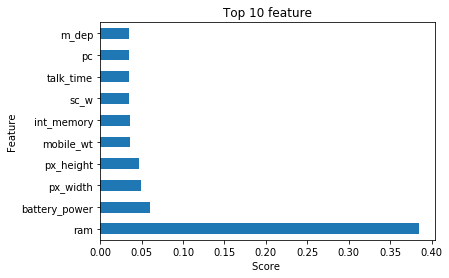

In [9]:
#lets see for top 10 feature weather this matching with our statistical test or not
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.xlabel('Score ')
plt.ylabel('Feature')
plt.title('Top 10 feature')
plt.show()

In [ ]:
#Here we can easily see that this is same as our statistical result where ram is on top position 
#to decide price of mobile hand set